In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [144]:
#read data
data =pd.read_csv('https://raw.githubusercontent.com/dalimed16/MLproject/main/data.csv', header=None)
df.rename(columns={0: 'x1', 1: 'x2', 2: 'y'}, inplace=True)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


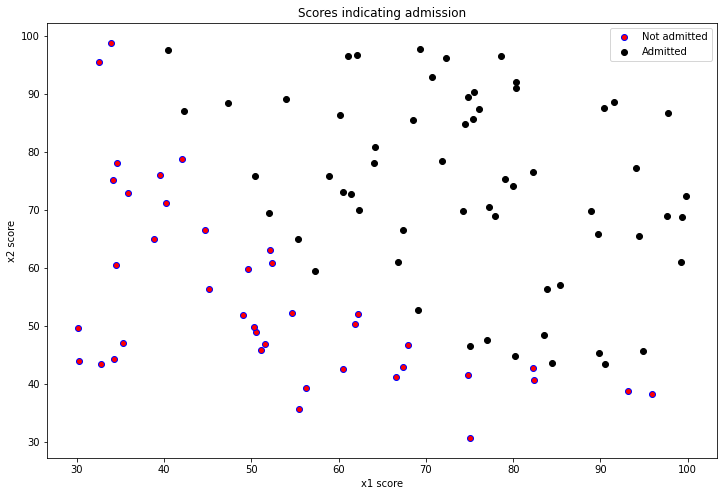

In [145]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['x1'], df[df['y'] == 0]['x2'],
            label='Not admitted', color='red', edgecolor='blue')
plt.scatter(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'],
            label='Admitted', color='black')
plt.xlabel('x1 score')
plt.ylabel('x2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

Définition de la fonction sigmoid 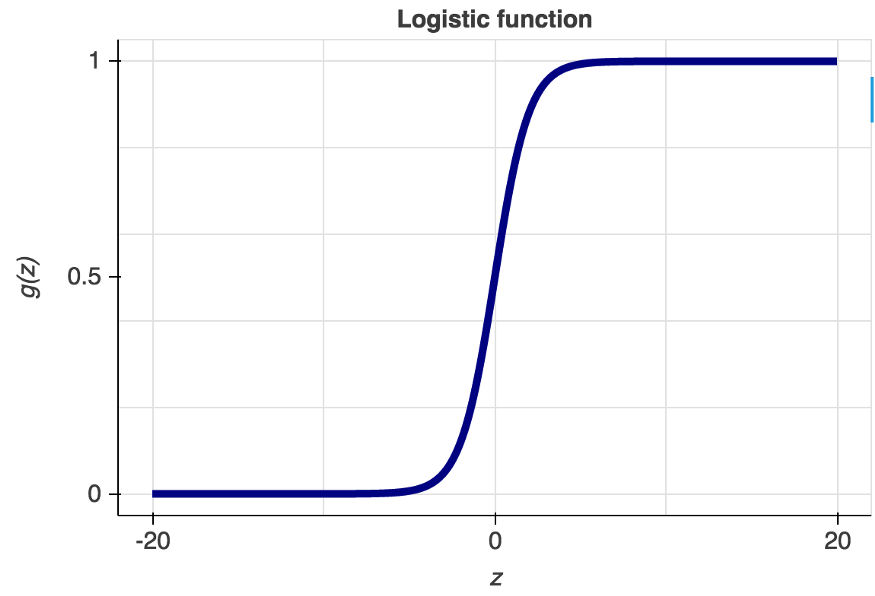

In [146]:
X = np.asarray(data[[0,1]])
Theta = np.array([[0],[0]])
Y = np.asarray(data[[2]])

In [147]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

Définition de la fonction hypothèse 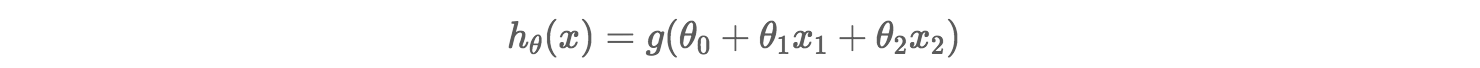

Définition de la fonction de coût 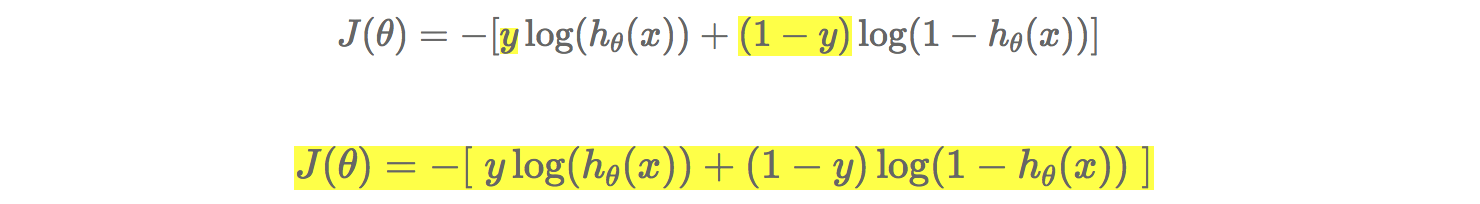

In [148]:
def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

Définition de gradient function 

In [149]:
def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    grad = np.matmul(X.T, (h - y)) / m;
    theta = theta - alpha * grad
    return theta

Itérations 

In [150]:
n_iterations = 500
learning_rate = 0.0001
errors=[]

for i in range(n_iterations):
    Theta = gradient_Descent(Theta, learning_rate, X, Y)
    c = cost(X, Y, Theta)
    errors.append(c)

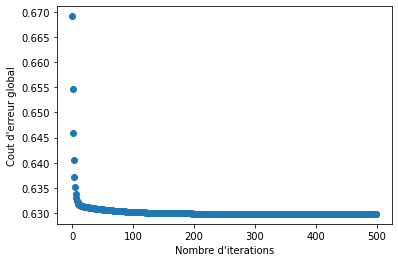

In [151]:
plt.scatter(range(n_iterations),errors)
plt.xlabel('Nombre d\'iterations')
plt.ylabel('Cout d\'erreur global')
plt.show()